### King's County

Imagine an up and coming place where realtors are working to price in this ever changing market.  How do they know how to get the most for what they have available? There are a pletorha of houses with different factors, but what will drive price?  What are people willing to pay more for?  These are all questions that we can only understand if we evaluate the data that's currently present.

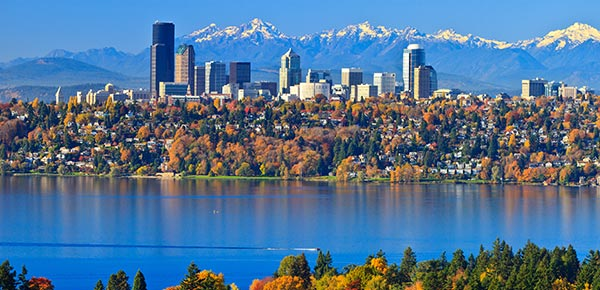

**In order to do this, we will need to use the **OSEMiN DATA SCIENCE WORKFLOW:**

First, let's look at the steps we are going to take in order to figure out what factors will drive price:

**O**btain Data
*For this step we will download all of the tools that we need in order to download and view the data set that we will be working with*

**S**crub Data
*The data that we obtain can be messy. We will need to clean the data which includes making sure that all columns contain correct datatypes, processing any NAs and making sure that there are no empty cells or symbols that will cause us to not be able to process data efficiently*

**E**xplore Data
*This is the part where there is no hypothesis being tested and no predictions are being evaluated.  We instead use this process in order to look at the columns, normalize where necessary, scale ad appropriate and understand what data is necessary moving forward.*

**M**odel Data
*This is the ultimate goal for our data problem, or in this case, how we will understand what drives housing price.  We will use the data that we've scrubbed and explored to see if we've done an accurate job with our data up to this point.*

**iN**terpret Results
*Finally, we look at the results to see if it best fits the problem or questions that we are trying to solve.*


---------------------------------------------------------------------------------------------------------------------

<font color=blue>1. **OBTAIN** In order to obtain the data we need to import all necessary libraries:</font>

In [774]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [775]:
kings_df = pd.read_csv('kc_house_data.csv')

In [776]:
kings_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Right away we can see that there are 21 columns we'll need to evaluate.

*id* will most likely be removed and irrelevant moving forward. In addition, we most likely do not need date. 

Further, We can already see in only the first few lines that there are NaNs that we'll need to look through further.

Let's take a look at the data another way:

In [777]:
kings_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From here we can see a few things that we'll want to invesitage right away
1. What does each column mean?
2. Are there NaNs located in the data?
3. Is there data encoded to the wrong data type?
4. Do we need to subsample or is the data limited enough that it becomes unnecessary?

**We'll go ahead and take a look at each column definition first so that we can better understand what we're looking at.  To do this, we'll go to the Kaggle database for this information.**

* **id** - Identifier for each house
* **date** - Date each house was sold
* **price**- This our dependent variable and what we'll be predicting
* **bedrooms** - Number of bedrooms 
* **bathrooms**- Number of bathrooms 
* **sqft_living** - Square footage 
* **sqft_lot**- Square footage of the lot (or the land the house is on)
* **floors** - Total floors in house
* **waterfront** - This indicates a house that has a view of the water
* **view** - This indiciates whether or not the house has been viewed
* **condition** - How good the overall condition of the house is in
* **grade** - This seems to be a grade that is assigned based on the county's grading system.
* **sqft_above** - Square footage of house, not including the basement level
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year the house was built
* **yr_renovated**- Most recent year the house was renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - Living room area in 2015 - this would mean that the house has since been renovated
* **sqft_lot15** -  Lot size area in 2015 - again, this would mean that the lot has since been renovated (probably a direct corelation to the sqft_living15, but we'll need to do more investigating before we can confirm)

Now that we know this we can move on to step two!



---------------------------------------------------------------------------------------------------------------------

<font color=blue>2. **SCRUB** Now that we know that there are NAs and have looked at the column details, we can start scrubbing the data.</font>


*<font color=red>We'll start by looking for improperly encoded datatypes</font>*

In [778]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


**Observations that we can make from here:**

*sate* is an object.  We'll either want to change this to date, or, more likely we'll remove it altogether.
*sqft_basement* is a string.  This should be a float or an integer so we'll have to change that. 
*grade and condition* both seem to be categorical.  We'll have to look into these further.

To understand both **grade** and **condition further** we'll go ahead and look at the unique values to see if they support the hypothesis that these to columns should, in fact, be categorical.

In [779]:
kings_df['condition'].unique()

array([3, 5, 4, 1, 2])

In [780]:
kings_df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

<font color=magenta>It's clear that these are categorical</font>

In [781]:
kings_df['condition'] = kings_df['condition'].astype('category')
kings_df['grade'] = kings_df['grade'].astype('category')

*Let's make sure that worked*

In [782]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(2), float64(8), int64(9), object(2)
memory usage: 3.

Perfect, now we can move on to the continuous data.

We'll start with **sqft_basement**.  We'll want to change this to a number but before we do, let's look at the values so we can see what we're working with.

In [783]:
kings_df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
1481.0        1
3260.0        1
2610.0        1
1816.0        1
861.0         1
1135.0        1
875.0         1
3480.0        1
2400.0        1
1960.0        1
704.0         1
2570.0        1
1525.0        1
588.0         1
2180.0        1
2500.0        1
2490.0        1
283.0         1
1920.0        1
792.0         1
768.0         1
518.0         1
3500.0        1
2240.0        1
172.0         1
2300.0        1
2730.0        1
946.0         1
862.0         1
2390.0        1
Name: sqft_basement, Len

In looking at the values, we can see that the second most common is "?".

This will stop us from converting the data type so we'll need to handle it first. We can either delete the "?"s, or replace them with a different value.

If you look at the values above, it's clear that a majority of the homes in Kings County do not have a basement.

In fact, out of 21597 entries, 12826 do not have a basement.  This is more than 50% of the data that we are working with.  Based on this information, it would be a safe assumption that the "?" more likely do not have basements, than do.  While we could delete them, it would make greater sense to change the "?"s to 0's.

In [784]:
kings_df['sqft_basement'] = kings_df['sqft_basement'].map(lambda x: '0' if x == '?' else x)

<font color=teal>Now we should be able to change the type to float</font>

In [785]:
kings_df['sqft_basement'] = kings_df['sqft_basement'].astype('float')

*Let's check to make sure this worked as well*

In [786]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: category(2), float64(9), int64(9), object(1)
memory usage: 3

<font color=copper>Now let's move on and look for the **NAs**</font>

In [787]:
kings_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

It's clear that *waterfront*, *view* and *yr_renovated* have NAs that we need to work with.

Let's start with **waterfront**.  I'd like to visualize to see how the non-NA data looks.

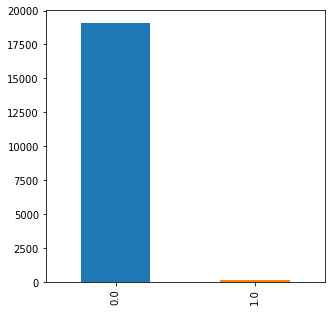

In [788]:
kings_df['waterfront'].value_counts().plot(kind='bar', figsize =[5,5])

Based on the above, we can see that almost all of the houses do not have a view of the water.  For this reason, 0.00 is our median and it makes the most sense to fill our NAs 0.

In [789]:
kings_df.waterfront.fillna(kings_df.waterfront.median(), inplace = True)

Next, let's visualize **view**

Text(0, 0.5, 'View Counts')

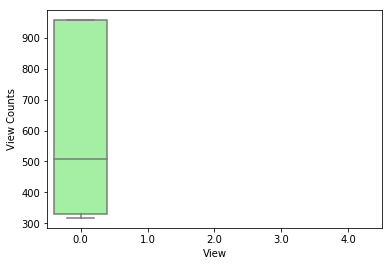

In [790]:
sns.boxplot(x=kings_df['view'], y = kings_df['view'].value_counts(),showfliers=False, color='palegreen')
plt.xlabel('View')
plt.ylabel('View Counts')

In [791]:
counts = kings_df['view'].value_counts().to_dict()
print(counts)

{0.0: 19422, 2.0: 957, 3.0: 508, 1.0: 330, 4.0: 317}


Between the visualization and the counts above, a majority of the houses have not yet been viewed.  Thus, it makes sense to fill our NAs again with the median, or 0.

In [792]:
kings_df.view.fillna(kings_df.view.median(), inplace = True)

Finally, let's take a look at **year renovated** and visualize it as well as check value counts.

Text(0, 0.5, 'Year Renovated Counts')

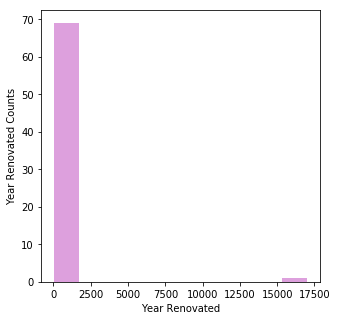

In [793]:
kings_df['yr_renovated'].value_counts().plot(kind='hist', figsize =[5,5], color = 'plum')
plt.xlabel('Year Renovated')
plt.ylabel('Year Renovated Counts')

Again, it seems like a majority of our houses have not been renovated, but let's also take a look at the value counts just to be sure.

In [794]:
counts2 = kings_df['yr_renovated'].value_counts()
print(counts2)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

There are so many more 0's than there are any other value that it makes sense to again, fill our NAs with 0's.  Should there have been a more diverse set of values that showed more prominence, we would have binned them, but in this case, updating to the median makes the most sense.

In [678]:
kings_df.yr_renovated.fillna(kings_df.yr_renovated.median(), inplace = True)

<font color=copper>Now, let's make sure there are no lingering NAs that we might have missed.</font>

In [679]:
kings_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Great! Now our data seems clean!** 

Before we move forward, let's go ahead and drop the *date* and *id* columns.  It seems that there are much greater predictors usable here to determine house price than sold date, and id is a unique identifier that will not help us to predict price.

In [795]:
kings_df.drop(['date'], axis=1, inplace = True)
kings_df.drop(['id'], axis=1, inplace = True)

In [796]:
kings_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


---------------------------------------------------------------------------------------------------------------------

<font color=blue>2. **EXPLORE** The data is scrubbed and now we can start evaluating each column further.</font>


*<font color=red>Before we break this down one by one, we should see the dataframe as a whole.  The best way to understand is to visualize this dataframe as a histogram</font>*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a571e9be0>,
      dtype=object)

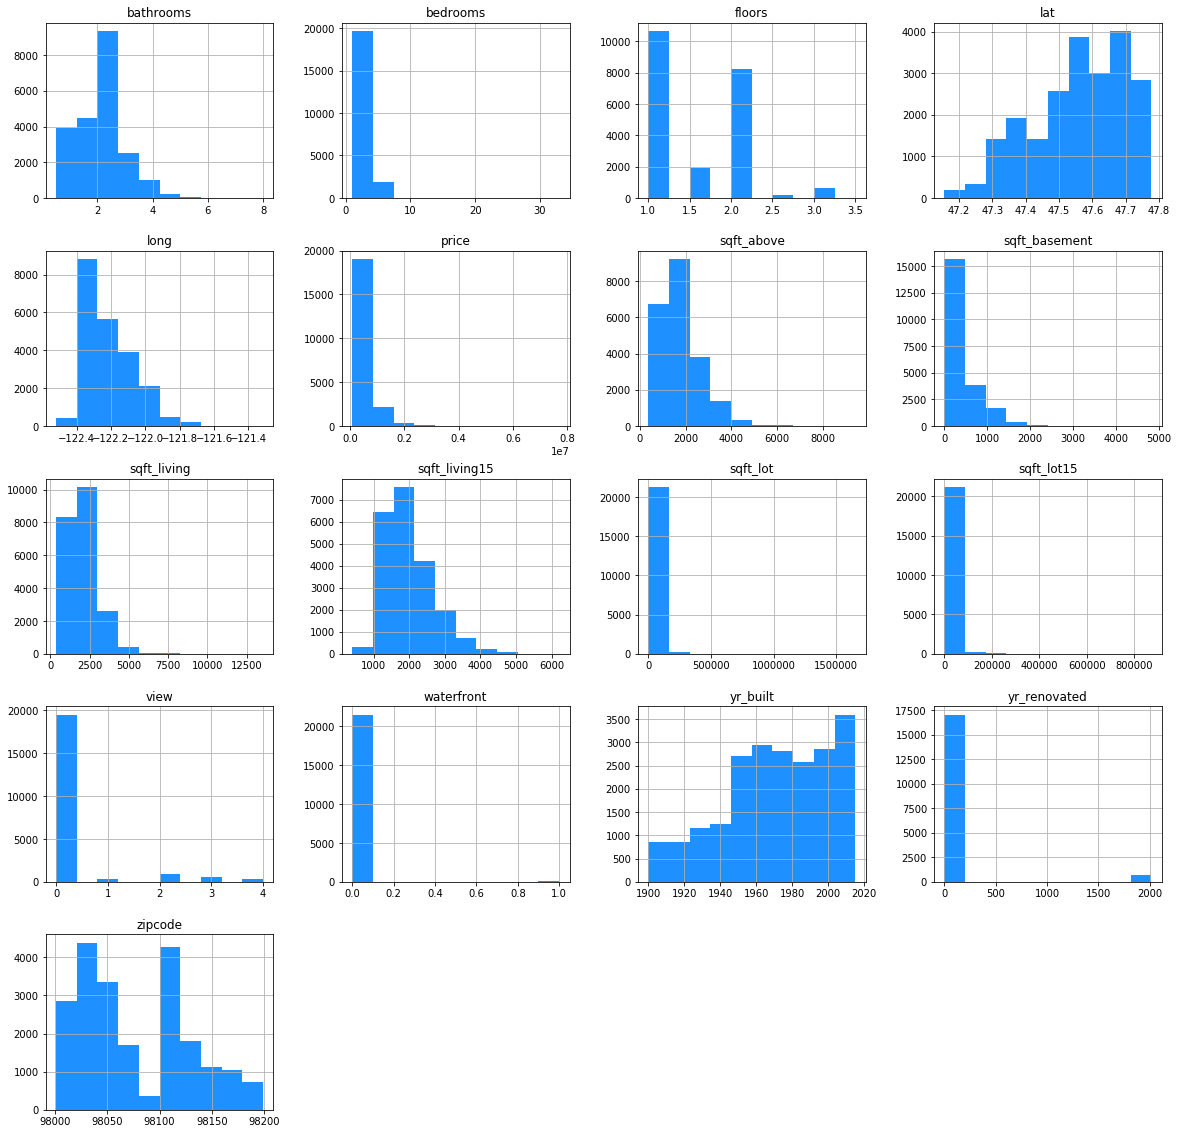

In [797]:
kings_df.hist(figsize=(20,20), color ='dodgerblue')

**Observations that we can make right away"**
* None of the above is normalized  
* View, Waterfront, Year_rennovated, sqft_lot15 and basement have a concentration at zero
* Our data is currently on different scales and we need to adjust accordingly in some instances.

*<font color=red>Before we start adjusting the columns one by one, let's check and see if any of these columns are highly correlated.  If they are, we'll need to remove them before we can proceed.</font>*

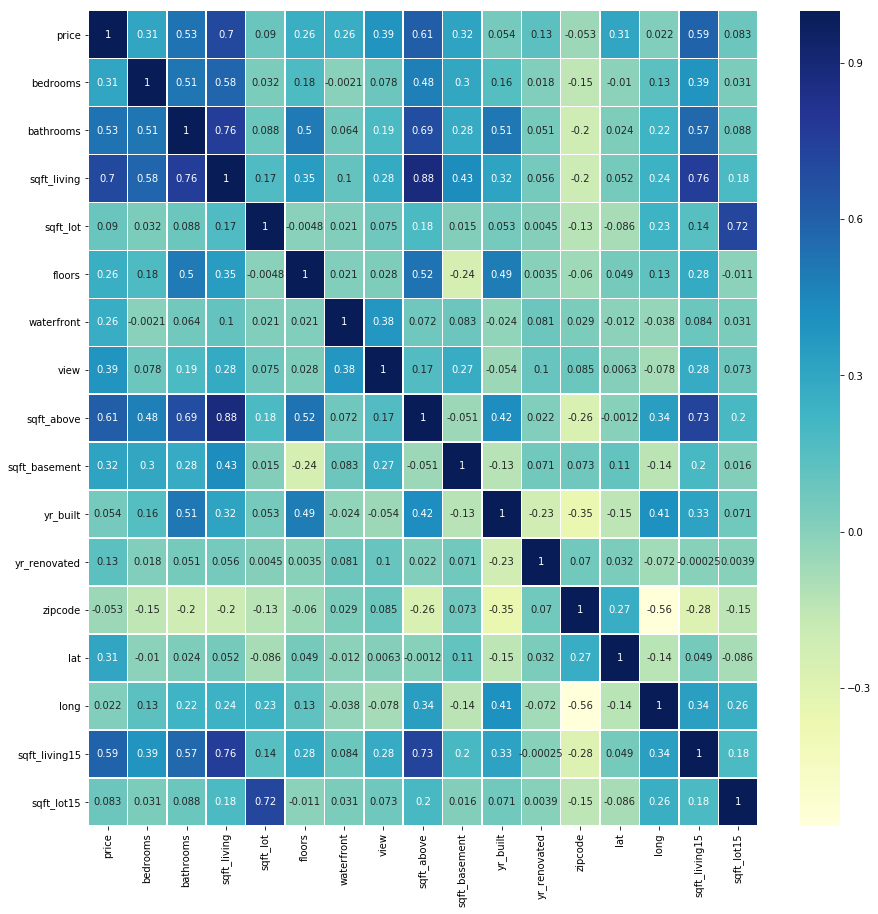

In [798]:
plt.figure(figsize=(15,15))
sns.heatmap(kings_df.corr(),annot=True,linewidth=0.5,cmap="YlGnBu")

Let's take this one step further by looking explicitly at the categories that have a correlation higher than .70

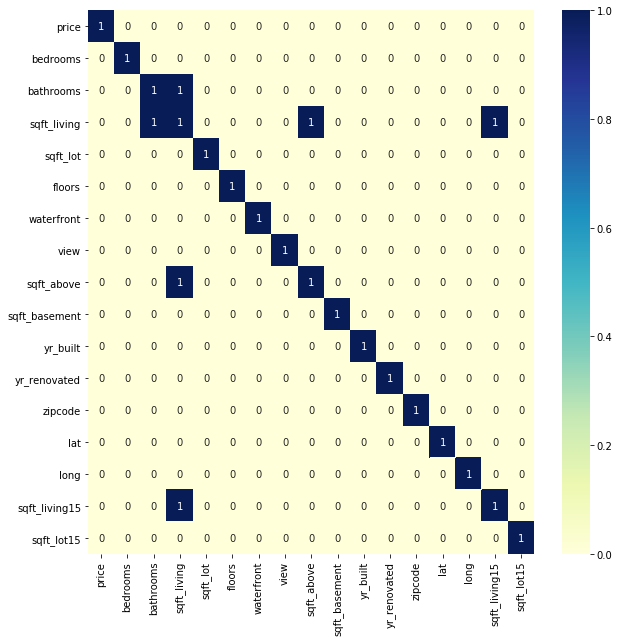

In [799]:
plt.figure(figsize=(10,10))
sns.heatmap(kings_df.corr() > .75,annot=True, cmap="YlGnBu")

**We can see that:**
* sqft_living and sqft_living15 are highly correlated
* sqft_above and sqft_living are highly correlated
* sqft_living and and bathrooms are highly correlated

I'll be dropping all but living15 and bathrooms to start.  Reason being that we can use sqft_living15 instead of sqft_living.  With the 2015 data, it seems as though we do not also need the pre-2015 information.  If the house wasn't renovated then the number will be the same under sqft_living and sqft_living15.

Additionally, we'll keep bathrooms for now as I'm interested in seeing the bedroom and bathroom affect together on pricing.

**Let's go ahead and drop sqft_living and sqft_above**

In [800]:
kings_df.drop(['sqft_living', 'sqft_above' ], axis=1, inplace = True)
kings_df.head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,101930,1.0,0.0,0.0,3,11,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,6819,2.0,0.0,0.0,3,7,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,9711,1.0,0.0,0.0,3,7,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,7470,1.0,0.0,0.0,3,7,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,6560,2.0,0.0,0.0,3,7,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


Now, I'd like to look at the correlation again to see if that got rid of all the things that were highly correlated.

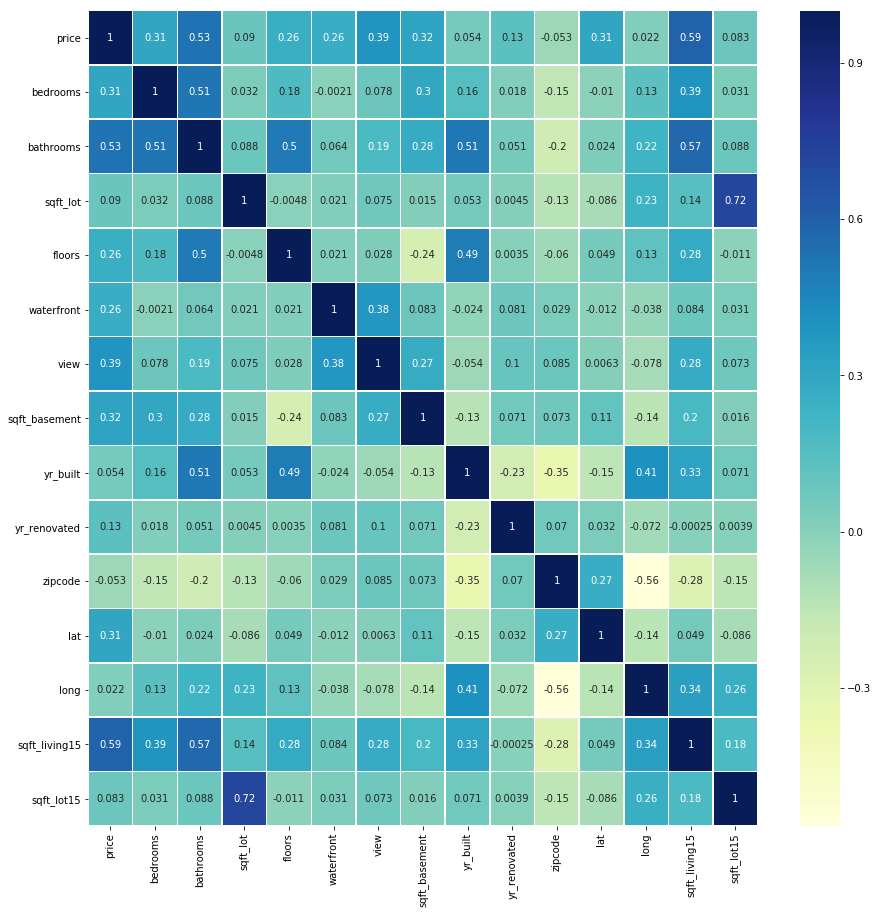

In [801]:
plt.figure(figsize=(15,15))
sns.heatmap(kings_df.corr(),annot=True,linewidth=0.5,cmap="YlGnBu")

It looks like squarefoot of the lot and squarefoot of living 15 seem to be highly correlated at .72 as well.  Let's remove sqft_lot because we stil have sqft_lot 15 to look at the most up to date data.

In [802]:
kings_df.drop(['sqft_lot'], axis=1, inplace = True)
kings_df.head(10)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0.0,0.0,3,6,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,1.0,0.0,0.0,3,11,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,2.0,0.0,0.0,3,7,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1.0,0.0,0.0,3,7,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1.0,0.0,0.0,3,7,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,2.0,0.0,0.0,3,7,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


**<font color=blue>Now that we've removed the highly correlated columns, let's go ahead and look at the remaining continuous columns one at a time.</font>**

First up **bedrooms**

Before we visualize, let's check the values to see if there are any extreme outliers.

In [803]:
 kings_df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We can see that there's a house with 33 bedrooms, which seems like bad data to me.  Let's drop the row where bedroom = 33.

In [804]:
kings_df.drop(kings_df.index[kings_df['bedrooms'] == 33], inplace=True)

In [805]:
 kings_df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

With this in mind, we can now visualize - let's start with a histogram

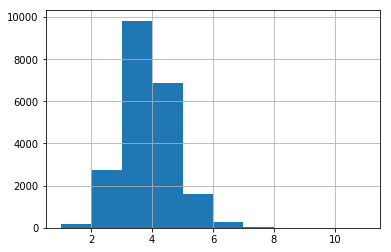

In [806]:
kings_df.bedrooms.hist()

This actually looks a lot more normal than it did before we removed the extreme outlier.  I'd also like to take a look at how bedrooms currently relate to price:

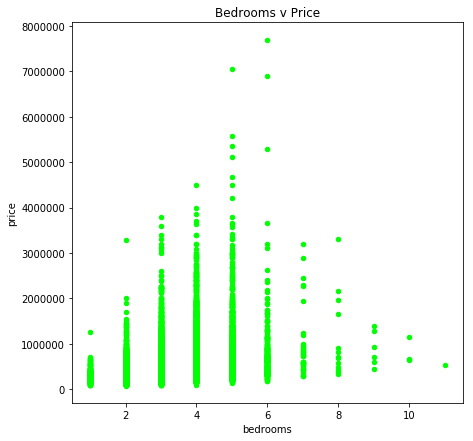

In [807]:
kings_df = kings_df.sort_values('bedrooms')
kings_df.plot(kind = 'scatter', x ='bedrooms', y = 'price', figsize = [7,7], color = 'lime')
plt.title('Bedrooms v Price')
plt.show()

It's very apparent that while an increase bedrooms does increase price from 1-5 bedrooms,, after that, there is actually more of a decline in price excluding a few outliers at 6 bedrooms.

I'd anticipate that we would have similar results with **bathrooms** and so lets take a look at the data for bathrooms next.

In [808]:
 kings_df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

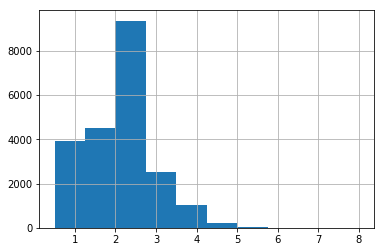

In [694]:
kings_df.bathrooms.hist()

It looks like a majority of the houses have between 2 and 3 bathrooms, but let's take a look further and see how bathroom count affects price.

/Users/blair/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


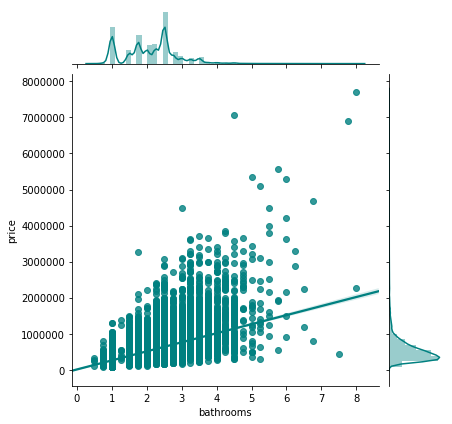

In [809]:
sns.jointplot(x= 'bathrooms', y= 'price', data= kings_df, kind='reg', color = 'teal')

We can see that there is a positive relationship between price and bathrooms with a few outliers as we increase.

Another column along the same lines is **floors**.  
These are the basic interior features that every house has and so I'd like to see if an increase in floors means an increase in price.

In [810]:
kings_df.floors.value_counts()

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Let's visualize this as well.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5bf065f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5bf06c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5bf06208>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5bf0f358>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5bf0f6a0>],
 'means': []}

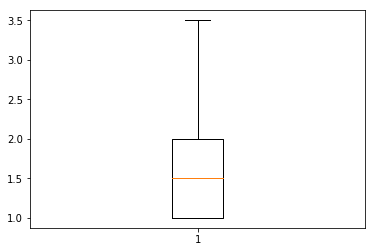

In [811]:
plt.boxplot(kings_df['floors'])

It's clear that the greatest outliers lie above 2, and when looking at the values, it looks like the greatest oulier lies at 3.5 bedrooms.  This can contribute to some messy data and so let's remove the 7 rows that contain 3.5 bedrooms.

In [812]:
kings_df.drop(kings_df.index[kings_df['floors'] == 3 ], inplace=True)

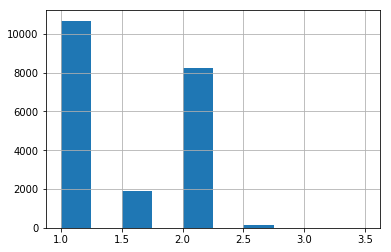

In [813]:
kings_df.floors.hist()

This is the best we're going to get this data to look as these are pretty strict numbers in terms of floors.  While we could make this categorical, I'd prefer to leave it as numbers for now. Lastly, I'd like to see how floors relate to price.

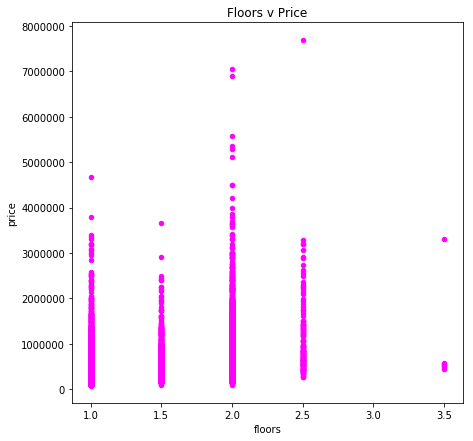

In [814]:
kings_df = kings_df.sort_values('floors')
kings_df.plot(kind = 'scatter', x ='floors', y = 'price', figsize = [7,7], color = 'magenta')
plt.title('Floors v Price')
plt.show()

In this case, it doesn't seem as though floors have a direct impact on price.

Next, we'll move on to **yr_built**

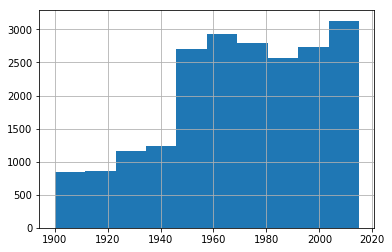

In [815]:
kings_df['yr_built'].hist()

Let's check out the relationship between year built and price but also add a third variable into the mix.

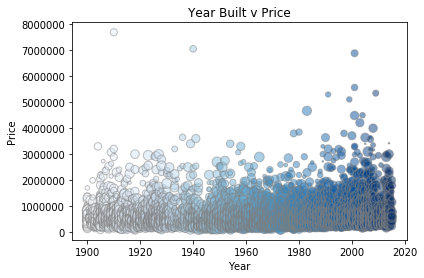

In [816]:
kings_df = kings_df.sort_values('yr_built')
x = kings_df['yr_built']
y = kings_df['price']
z = np.random.rand(40)
plt.scatter(x, y, s=z*100, c=x, cmap="Blues", alpha=0.5, edgecolors="grey", linewidth=1)
plt.title('Year Built v Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

It's pretty clear based on the above that the year built has an impact, but not a huge one on price.

One aspect of data that I would anticipate would be one of the more impactful influencers of price is location.  The data that we're provided gives us three columns that correspond with location: **latitude**, **longitude** and **zipcode**.  I don't feel that we need lat, long AND zipcode and I feel that latitude and longitue can provide a greater insight than zipcode.  Through latitude and longitude we can see not just how prices change based on a single location, but also how movement north or west for example can impact price.

For this reason, let's **go ahead and drop zipcode** and then start working with our additional location data.

In [817]:
kings_df.drop(['zipcode'], axis=1, inplace = True)

In [818]:
kings_df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
5231,199999.0,3,1.00,1.0,0.0,0.0,5,5,0.0,1900,0.0,47.3091,-122.006,1330,10815
8891,452000.0,4,1.00,1.5,0.0,0.0,3,6,0.0,1900,0.0,47.6872,-122.344,1540,3800
2974,430000.0,2,1.50,1.5,0.0,0.0,3,7,0.0,1900,0.0,47.6652,-122.338,1390,4013
18901,554600.0,3,1.75,1.5,0.0,0.0,5,7,0.0,1900,NaN,47.6755,-122.369,1530,5000
14783,560000.0,4,1.00,1.5,0.0,0.0,2,6,0.0,1900,0.0,47.6038,-122.314,1010,5814


Let's now start by viewing latitude and longitude as they relate to each other.  It would be helpful to know where the crux of the houses lie when planning where to either build new ones, or, where to price based on popularity.

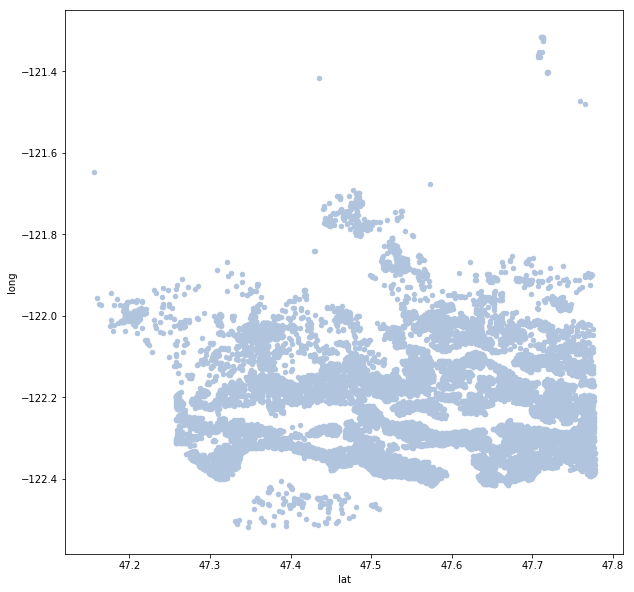

In [819]:
kings_df.plot(kind = 'scatter', x ='lat', y = 'long', figsize = [10,10], color ='lightsteelblue')
plt.show()

We can see, based on the above that there are certain outliers farther up on the graph and that the most popular areas are packed with scatter points.

Now, we can view how this location data impacts price:

Text(0, 0.5, 'Latitude')

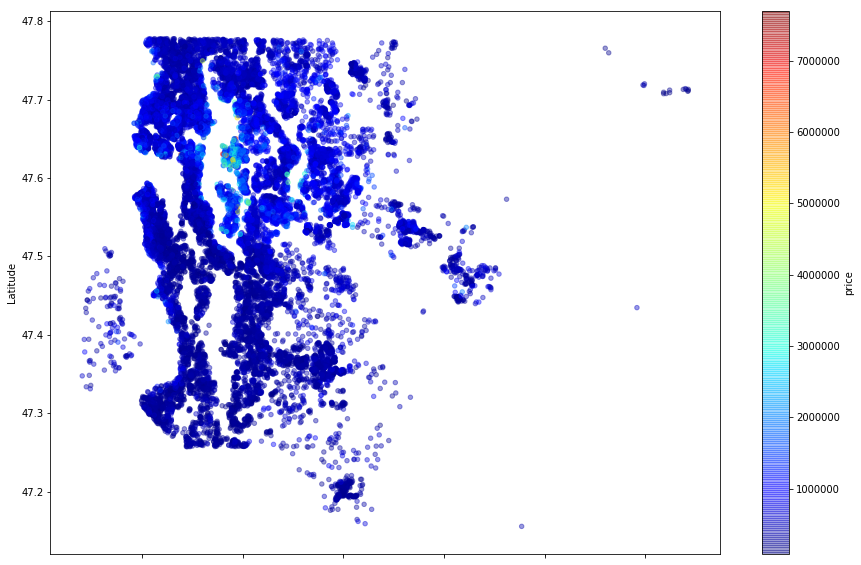

In [820]:
my_plot = kings_df.plot(kind="scatter", x="long", y="lat",
  c="price", cmap=plt.get_cmap("jet"),
  colorbar=True, alpha=0.4, figsize=(15,10))
my_plot.set_xlabel('Longitude')
my_plot.set_ylabel('Latitude')

From here we can see which specific areas have the greatest price.  This will help us to understand where we can price over market vs. where we need to stay within the market price due to the plethora of options in that area.

Now that we've been able to observe this further, I'd like to look at **view** and **waterfront**, since I do believe that houses with views and houses with waterfronts will drive price significantly.

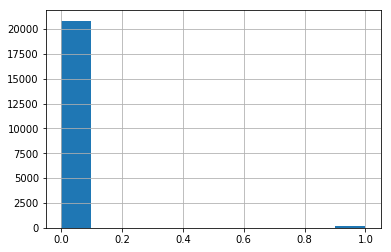

In [707]:
kings_df['waterfront'].hist()

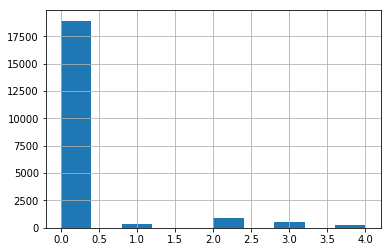

In [708]:
kings_df['view'].hist()

<font color=blue>We can't really normalize either of these so we'll move forward and look how each relates to price individually.</font>

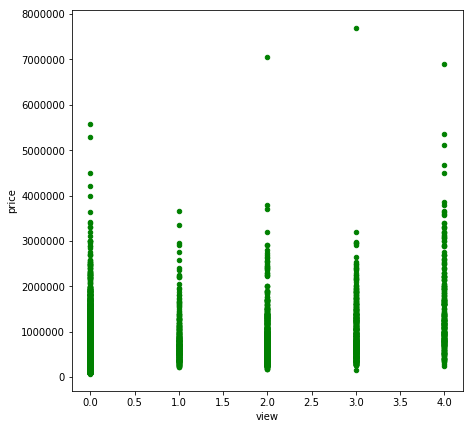

In [709]:
kings_df = kings_df.sort_values('view')
kings_df.plot(kind = 'scatter', x ='view', y = 'price', figsize = [7,7], color = 'green')
plt.show()

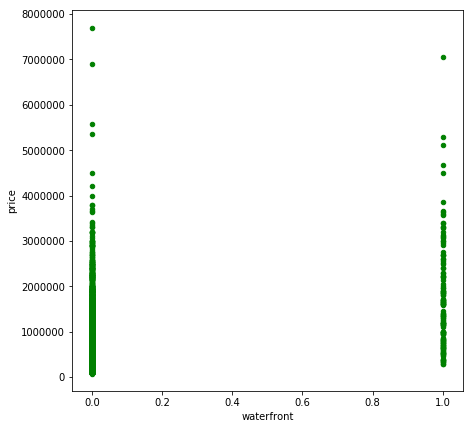

In [710]:
kings_df = kings_df.sort_values('waterfront')
kings_df.plot(kind = 'scatter', x ='waterfront', y = 'price', figsize = [7,7], color = 'green')
plt.show()

After evaluating the above, it's clear that having a view seems to drive house price, but in not all cases does having a waterfront view drive price.  Additionally, it seems to me that given the data, we might want to make waterfront categorical afterall.  Let's take a look at the unique values.

In [711]:
kings_df['waterfront'].unique()

array([0., 1.])

I think based on this, we can make this a categorical field where 0 = no view and 1 = view.

In [712]:
kings_df['waterfront'] = kings_df['waterfront'].astype('category')

Next, let's look at the most up to date data from 2015:    **sqft_living15** and **sqft_lot15**

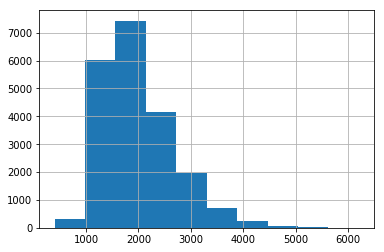

In [713]:
kings_df['sqft_living15'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3544d4a8>]],
      dtype=object)

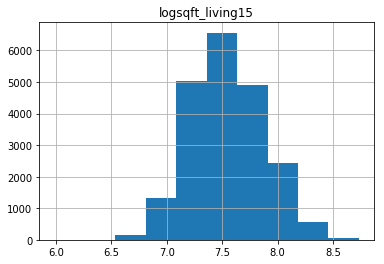

In [714]:
import numpy as np
kings_log = pd.DataFrame([])
kings_log["logsqft_living15"] = np.log(kings_df["sqft_living15"])
kings_log.hist()

That looks much better.  Let's also take a look at sqft_lot.  After we normalize that one (if necessary) we can go ahead and scale)

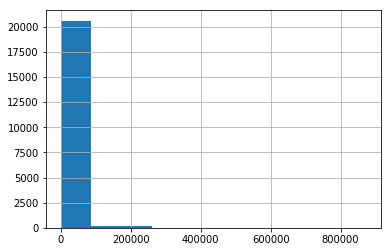

In [715]:
kings_df['sqft_lot15'].hist()

This one looks like it tails to the right and might have some outliers we want to look into further.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a3566ef28>,
 'caps': [<matplotlib.lines.Line2D at 0x1a35679898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3566edd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a35679f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3567b2b0>],
 'means': []}

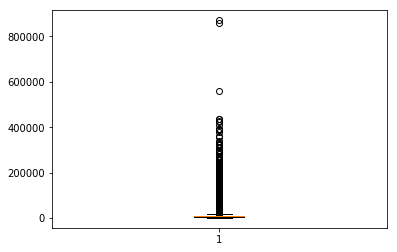

In [716]:
plt.boxplot(kings_df['sqft_lot15'])

We can see that there are significant outliers over 800000. Let's check just how many:

In [717]:
(kings_df['sqft_lot15'] > 800000).value_counts()

False    20983
True         2
Name: sqft_lot15, dtype: int64

Only .009% of the data exists in this outlier.  For this reason, we can go ahead and drop the two rows where the value > 800000

In [718]:
kings_df.drop(kings_df.index[kings_df['sqft_lot15'] >800000 ], inplace=True)

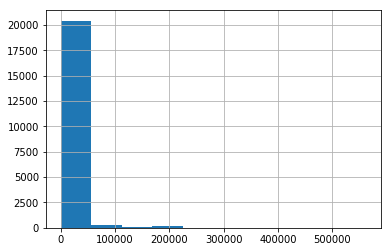

In [624]:
kings_df['sqft_lot15'].hist()

This is still not normal, but it seems better.  I'd like to check one more thing:

In [719]:
(kings_df['sqft_lot15'] > 500000).value_counts()

False    20982
True         1
Name: sqft_lot15, dtype: int64

Let's go ahead and drop this outlier row as well.

In [720]:
kings_df.drop(kings_df.index[kings_df['sqft_lot15'] >500000 ], inplace=True)

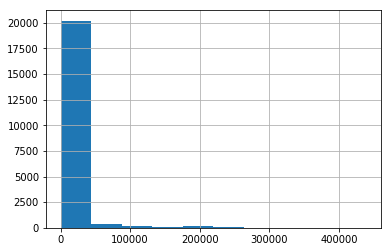

In [627]:
kings_df['sqft_lot15'].hist()

Let's look at the log transformed data for both this and sqft_living 15 at the same time so we can make sure both look better.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3569c2b0>,
      dtype=object)

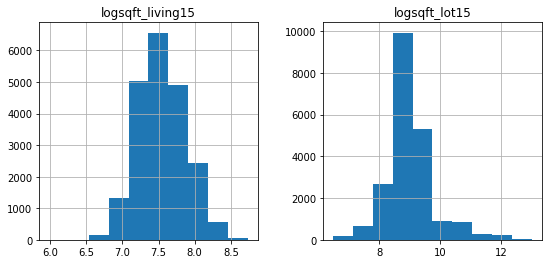

In [721]:
kings_log = pd.DataFrame([])
kings_log["logsqft_lot15"] = np.log(kings_df["sqft_lot15"])
kings_log["logsqft_living15"] = np.log(kings_df["sqft_living15"])
kings_log.hist(figsize = [9,4])

Now that these two columns look better, I'd like to scale them so that everything is more in line.

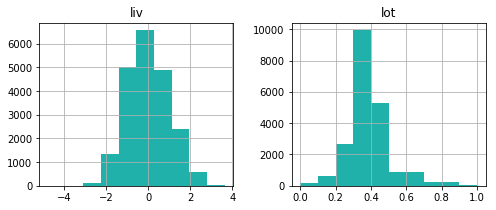

In [722]:
loglot = kings_log["logsqft_lot15"]
logliv = kings_log["logsqft_living15"]


scaled_lot = (loglot-min(loglot))/(max(loglot)-min(loglot))	
scaled_liv = (logliv-np.mean(logliv))/np.sqrt(np.var(logliv))

kings_df_cont_scaled = pd.DataFrame([])
kings_df_cont_scaled["lot"]= scaled_lot
kings_df_cont_scaled["liv"]= scaled_liv


kings_df_cont_scaled.hist(figsize  = [8, 3], color = ['lightseagreen']);

Now that we've gone through the continuous data, I'd like to go back to the categorical data so that we can create dummy variables.  For each independent dummy variable, we will see some observations that a value of 0, which will cause that variable's coefficient to have no role in influencing the dependent variable, while others will my takes on a value 1, which means its coefficient will act to alter the intercep, or influence price.

In [723]:
grade_d = pd.get_dummies(kings_df["grade"], prefix="gr")
condition_d = pd.get_dummies(kings_df["condition"], prefix="con")
water_d = pd.get_dummies(kings_df["waterfront"], prefix="wat")

In [724]:
kings_df = pd.concat([kings_df, grade_d, condition_d, water_d],axis = 1)

In [632]:
kings_df

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,...,gr_11,gr_12,gr_13,con_1,con_2,con_3,con_4,con_5,wat_0.0,wat_1.0
5231,199999.0,3,1.00,1.0,0.0,0.0,5,5,0.0,1900,...,0,0,0,0,0,0,0,1,1,0
4873,1150000.0,4,2.50,2.0,0.0,0.0,4,9,0.0,1925,...,0,0,0,0,0,0,1,0,1,0
13454,520000.0,3,2.00,1.0,0.0,0.0,5,7,580.0,1925,...,0,0,0,0,0,0,0,1,1,0
4195,875000.0,4,3.50,1.5,0.0,0.0,3,7,810.0,1926,...,0,0,0,0,0,1,0,0,1,0
18296,530100.0,3,1.00,1.5,0.0,0.0,3,7,340.0,1926,...,0,0,0,0,0,1,0,0,1,0
10041,665000.0,2,2.50,1.0,0.0,0.0,5,8,1300.0,1926,...,0,0,0,0,0,0,0,1,1,0
1663,662990.0,3,1.75,1.5,0.0,0.0,5,7,0.0,1926,...,0,0,0,0,0,0,0,1,1,0
12482,660000.0,3,2.00,1.0,0.0,0.0,5,7,0.0,1926,...,0,0,0,0,0,0,0,1,1,0
18176,400000.0,3,2.00,1.5,0.0,0.0,4,7,0.0,1925,...,0,0,0,0,0,0,1,0,1,0
19559,575000.0,3,2.25,1.5,0.0,0.0,4,7,960.0,1926,...,0,0,0,0,0,0,1,0,1,0


In [725]:
kings_df.drop(['grade'], axis=1, inplace = True)
kings_df.drop(['condition'], axis=1, inplace = True)
kings_df.drop(['waterfront'], axis=1, inplace = True)

In [726]:
kings_df.head()

,price,bedrooms,bathrooms,floors,view,sqft_basement,yr_built,yr_renovated,lat,long,...,gr_11,gr_12,gr_13,con_1,con_2,con_3,con_4,con_5,wat_0.0,wat_1.0
5231,199999.0,3,1.0,1.0,0.0,0.0,1900,0.0,47.3091,-122.006,...,0,0,0,0,0,0,0,1,1,0
4873,1150000.0,4,2.5,2.0,0.0,0.0,1925,0.0,47.6427,-122.304,...,0,0,0,0,0,0,1,0,1,0
13454,520000.0,3,2.0,1.0,0.0,580.0,1925,0.0,47.5425,-122.390,...,0,0,0,0,0,0,0,1,1,0
4195,875000.0,4,3.5,1.5,0.0,810.0,1926,0.0,47.6835,-122.342,...,0,0,0,0,0,1,0,0,1,0
18296,530100.0,3,1.0,1.5,0.0,340.0,1926,0.0,47.6853,-122.359,...,0,0,0,0,0,1,0,0,1,0


Now let's add our scaled data so that we can have a complete and updated dataframe to work with.

In [727]:
kings_df = pd.concat([kings_df, scaled_lot, scaled_liv],axis = 1)

In [638]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20982 entries, 5231 to 6471
Data columns (total 34 columns):
price               20982 non-null float64
bedrooms            20982 non-null int64
bathrooms           20982 non-null float64
floors              20982 non-null float64
view                20982 non-null float64
sqft_basement       20982 non-null float64
yr_built            20982 non-null int64
yr_renovated        20982 non-null float64
lat                 20982 non-null float64
long                20982 non-null float64
sqft_living15       20982 non-null int64
sqft_lot15          20982 non-null int64
gr_3                20982 non-null uint8
gr_4                20982 non-null uint8
gr_5                20982 non-null uint8
gr_6                20982 non-null uint8
gr_7                20982 non-null uint8
gr_8                20982 non-null uint8
gr_9                20982 non-null uint8
gr_10               20982 non-null uint8
gr_11               20982 non-null uint8
gr_12       

In [728]:
kings_df.drop(['sqft_lot15'], axis=1, inplace = True)
kings_df.drop(['sqft_living15'], axis=1, inplace = True)
kings_df.drop(['lot'], axis=1, inplace = True)
kings_df.drop(['liv'], axis=1, inplace = True)

KeyError: "['lot'] not found in axis"

In [729]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20982 entries, 5231 to 6471
Data columns (total 30 columns):
price               20982 non-null float64
bedrooms            20982 non-null int64
bathrooms           20982 non-null float64
floors              20982 non-null float64
view                20982 non-null float64
sqft_basement       20982 non-null float64
yr_built            20982 non-null int64
yr_renovated        20982 non-null float64
lat                 20982 non-null float64
long                20982 non-null float64
gr_3                20982 non-null uint8
gr_4                20982 non-null uint8
gr_5                20982 non-null uint8
gr_6                20982 non-null uint8
gr_7                20982 non-null uint8
gr_8                20982 non-null uint8
gr_9                20982 non-null uint8
gr_10               20982 non-null uint8
gr_11               20982 non-null uint8
gr_12               20982 non-null uint8
gr_13               20982 non-null uint8
con_1       

Great! Now that we've added our transformed data columns and dropped the others, we can start modeling.

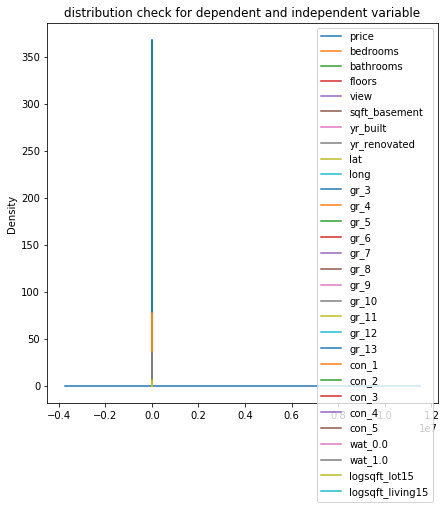

In [730]:
kings_df.plot.kde(figsize = [7,7])
plt.title("distribution check for dependent and independent variable")
plt.show()

In [738]:
from sklearn.model_selection import train_test_split
X = kings_df.drop('price', axis = 1)
y = kings_df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [739]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16785 4197 16785 4197


In [740]:
#Apply Model to the Train Set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [741]:
#Fit the model to the train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [742]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [743]:
#Calculate predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [744]:
#Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [745]:
#Calculate the Mean Squared Error
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 39936006843.46782
Test Mean Squarred Error: 38707855038.50421


While the train and test mean squared errors are relatively large, they are close in value, which identifies that the test reflects the train well.

Additionally - the data is too large and different to have a small MSE

**Now, Let's evaluate the effect of the train-test split size**

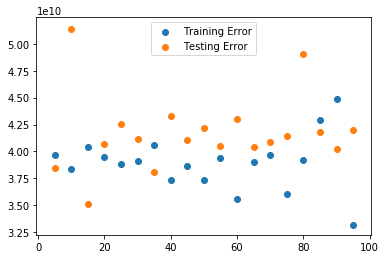

In [746]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

##as increase the amount you're training you're overfitting the data because you get too comfortable with the data you're seeing and want to find a middle ground.

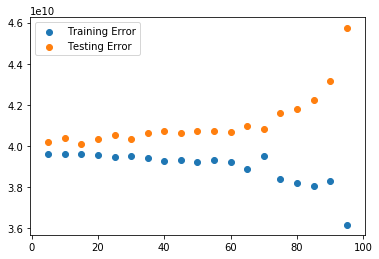

In [747]:
random.seed(8)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [748]:
#K-Fold Cross Validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [749]:
cv_5_results

-54667317556.80745

In [750]:
cv_10_results

-44185602133.39274

In [751]:
cv_20_results

-43540862073.210526

In [ ]:
#mean squared error (negates it so larger means better up top)

In [752]:
# generating OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

predictors_int = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     154.2
Date:                Sun, 09 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:30:39   Log-Likelihood:                -14219.
No. Observations:                1049   AIC:                         2.849e+04
Df Residuals:                    1023   BIC:                         2.862e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.445e+07   3.85e+06     -3.753      0.000    -2.2e+07   -6.89e+06
bedrooms          7182.7735   8690.852      0.826      0.409   -9871.160    2.42e+04
bathrooms          9.79e+04   1.38e+04      7.086      0.000    7.08e+04    1.25e+05
floors            1.494e+04   1.82e+04      0.819      0.413   -2.09e+04    5.07e+04
view              6.333e+04   9147.511      6.923      0.000    4.54e+04    8.13e+04
sqft_basement       27.8874     17.514      1.592      0.112      -6.480      62.255
yr_built         -2524.4502    309.041     -8.169      0.000   -3130.876   -1918.024
yr_renovated        65.5830     16.554      3.962      0.000      33.100      98.066
lat               5.578e+05   4.63e+04     12.036      0.000    4.67e+05    6.49e+05
long             -4.994e+04    5.1e+04     -0.979      0.328    -1.5e+05    5.02e+04
gr_3              9.795e-08   2.58e-08      3.791      0.000    4.72e-08    1.49e-07
gr_4             -2.331e+06   3.94e+05     -5.919      0.000    -3.1e+06   -1.56e+06
gr_5             -2.363e+06   3.83e+05     -6.165      0.000   -3.12e+06   -1.61e+06
gr_6             -2.332e+06   3.87e+05     -6.030      0.000   -3.09e+06   -1.57e+06
gr_7             -2.265e+06   3.88e+05     -5.837      0.000   -3.03e+06    -1.5e+06
gr_8             -2.196e+06   3.89e+05     -5.647      0.000   -2.96e+06   -1.43e+06
gr_9             -2.039e+06   3.91e+05     -5.218      0.000   -2.81e+06   -1.27e+06
gr_10            -1.824e+06   3.92e+05     -4.652      0.000   -2.59e+06   -1.05e+06
gr_11            -1.429e+06   3.94e+05     -3.625      0.000    -2.2e+06   -6.55e+05
gr_12            -1.331e+06   4.25e+05     -3.131      0.002   -2.17e+06   -4.97e+05
gr_13             3.664e+06   4.26e+05      8.605      0.000    2.83e+06     4.5e+06
con_1            -2.138e+06   7.88e+05     -2.712      0.007   -3.68e+06   -5.91e+05
con_2            -3.169e+06   7.75e+05     -4.088      0.000   -4.69e+06   -1.65e+06
con_3            -3.063e+06    7.7e+05     -3.976      0.000   -4.57e+06   -1.55e+06
con_4            -3.058e+06   7.69e+05     -3.974      0.000   -4.57e+06   -1.55e+06
con_5             -3.02e+06   7.68e+05     -3.930      0.000   -4.53e+06   -1.51e+06
wat_0.0          -7.697e+06   1.93e+06     -3.988      0.000   -1.15e+07   -3.91e+06
wat_1.0           -6.75e+06   1.92e+06     -3.513      0.000   -1.05e+07   -2.98e+06
logsqft_lot15    -2.856e+04   6.36e+04     -0.449      0.654   -1.53e+05    9.63e+04
logsqft_living15  4.986e+04   8971.917      5.558      0.000    3.23e+04    6.75e+04
==============================================================================
Omnibus:                      504.144   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5346.821
Skew:                           1.941   P

P Values

All of the independent variables have a relatively small p-values, meaning that they are statistically significant except for long, logsqft_lot15, bedroms, sqft_basementand floors, showing that these are statsitically insignificant in making predictions.

R-Squard

The R-Square values is 0.79, which means the current model has an explanatory power of 79%.This means that the variables that we have worked with are able to predict price significantly with approximately 21% coming from different factors that might not be included in our dataset or errors in our current model.

Understanding Errors - P value is highest for bedrooms and floors - These most likely could also have been categorical, but given that we have a significant R-squared and a plethora of other variables to present, I think we are safe to conclude with the data as it is right now.